In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
Ratings = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\Python\\Assignment\\knn\\bmd.csv")
Ratings = Ratings.dropna()
Ratings.head()

,user_id,movie_id,title,genre,rating
0,2,tt0118578,Albela,Romance,2
1,3,tt0169102,Lagaan: Once Upon a Time in India,Adventure | Drama | Musical,6
2,4,tt0187279,Meri Biwi Ka Jawab Nahin,Action | Comedy,1
3,5,tt0222024,Hum Tumhare Hain Sanam,Drama | Romance,4
4,6,tt0227194,One 2 Ka 4,Action | Comedy | Drama,1


In [4]:
Movies = pd.read_csv("C:\\Users\\Admin\\OneDrive\\Documents\\Python\\Assignment\\knn\\BollywoodMovieDetail.csv")
Movies = Movies.dropna()
Movies.head()

,movie_id,title,releaseYear,releaseDate,genre,writers,actors,directors,sequel,hitFlop
0,tt0118578,Albela,2001,20-Apr-01,Romance,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,tt0169102,Lagaan: Once Upon a Time in India,2001,08-May-02,Adventure | Drama | Musical,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
3,tt0222024,Hum Tumhare Hain Sanam,2002,24-May-02,Drama | Romance,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
4,tt0227194,One 2 Ka 4,2001,30-Mar-01,Action | Comedy | Drama,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
5,tt0238936,Devdas,2002,12-Jul-02,Musical | Romance,Saratchandra Chatterjee (based on the novel by...,Shah Rukh Khan | Madhuri Dixit | Aishwarya Rai...,Sanjay Leela Bhansali,0.0,6


In [5]:
data = pd.merge(Ratings, Movies, on=('movie_id', 'title','genre'))
data=data.dropna()
data.head()

,user_id,movie_id,title,genre,rating,releaseYear,releaseDate,writers,actors,directors,sequel,hitFlop
0,2,tt0118578,Albela,Romance,2,2001,20-Apr-01,Honey Irani (screenplay) | Honey Irani (story)...,Govinda | Aishwarya Rai Bachchan | Jackie Shro...,Deepak Sareen,0.0,2
1,3,tt0169102,Lagaan: Once Upon a Time in India,Adventure | Drama | Musical,6,2001,08-May-02,Ashutosh Gowariker (story) | Ashutosh Gowarike...,Aamir Khan | Gracy Singh | Rachel Shelley | Pa...,Ashutosh Gowariker,0.0,6
2,5,tt0222024,Hum Tumhare Hain Sanam,Drama | Romance,4,2002,24-May-02,K.S. Adiyaman | Arun Kumar (assistant dialogue...,Shah Rukh Khan | Madhuri Dixit | Salman Khan |...,K.S. Adiyaman,0.0,4
3,6,tt0227194,One 2 Ka 4,Action | Comedy | Drama,1,2001,30-Mar-01,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1
4,7,tt0238936,Devdas,Musical | Romance,6,2002,12-Jul-02,Saratchandra Chatterjee (based on the novel by...,Shah Rukh Khan | Madhuri Dixit | Aishwarya Rai...,Sanjay Leela Bhansali,0.0,6


C:\Users\Admin\AppData\Local\Temp\ipykernel_18552\3692132557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['rating'])


<Axes: xlabel='rating', ylabel='Density'>

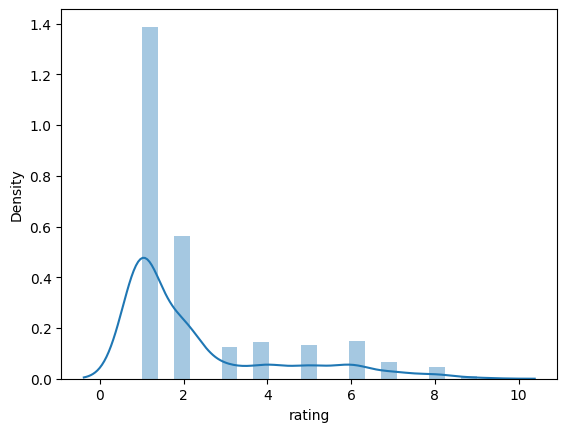

In [6]:
sns.distplot(data['rating'])

In [7]:
import numpy as np

movieProperties = data.groupby('movie_id').agg({'rating': [np.size, np.mean]})
movieProperties.head()

rating     
            size mean
movie_id             
tt0118578      1  2.0
tt0169102      1  6.0
tt0222024      1  4.0
tt0227194      1  1.0
tt0238936      1  6.0

In [8]:
mean_data = data.groupby('movie_id')[['rating']].mean()

In [9]:
lowest_rated = mean_data['rating'].idxmin()
data.loc[data['movie_id'] == lowest_rated]

,user_id,movie_id,title,genre,rating,releaseYear,releaseDate,writers,actors,directors,sequel,hitFlop
3,6,tt0227194,One 2 Ka 4,Action | Comedy | Drama,1,2001,30-Mar-01,Sanjay Chhel | Raaj Kumar Dahima (screenplay) ...,Shah Rukh Khan | Juhi Chawla | Jackie Shroff |...,Shashilal K. Nair,0.0,1


In [10]:
highest_rated = mean_data['rating'].idxmax()
data.loc[data['movie_id'] == highest_rated]

,user_id,movie_id,title,genre,rating,releaseYear,releaseDate,writers,actors,directors,sequel,hitFlop
27,34,tt0284137,Gadar: Ek Prem Katha,Action | Drama | Romance,9,2001,15-Jun-01,Shaktimaan Talwar,Sunny Deol | Ameesha Patel | Amrish Puri | Lil...,Anil Sharma,0.0,9


In [11]:
movieNumRatings = pd.DataFrame(movieProperties['rating']['mean'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,mean
movie_id,
tt0118578,0.125
tt0169102,0.625
tt0222024,0.375
tt0227194,0.000
tt0238936,0.625


In [12]:
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
movieNormalizedNumRatings.head()

,size
movie_id,
tt0118578,NaN
tt0169102,NaN
tt0222024,NaN
tt0227194,NaN
tt0238936,NaN


In [13]:
n_ratings = len(Ratings)
n_movie = len(Movies)
n_movie = Movies['title']
n_movies = len(Ratings['movie_id'].unique())
n_users = len(Ratings['user_id'].unique())

In [14]:
print(f"name of the movie: {n_movie}")
print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 10)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 10)}")

name of the movie: 0                                  Albela
1       Lagaan: Once Upon a Time in India
3                  Hum Tumhare Hain Sanam
4                              One 2 Ka 4
5                                  Devdas
                      ...                
1275                                Spark
1276                            Jigariyaa
1277                  Mumbai Delhi Mumbai
1278                    Love U Crazy Girl
1283                                  Zid
Name: title, Length: 1131, dtype: object
Number of ratings: 1282
Number of unique movieId's: 1282
Number of unique users: 1282
Average ratings per user: 1.0
Average ratings per movie: 1.0


In [15]:
avg_rating=(n_ratings/n_users)
print(avg_rating)

1.0


In [16]:
movieDict=data.head() 

In [17]:
from scipy import spatial

def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [20]:
import operator

def getNeighbors(movie_id, K):
    distances = []
    for movie in movieDict:
        if (movie != movie_id):
            dist = ComputeDistance(movieDict[movie_id], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors

K = 7
avgRating = 0
neighbors = getNeighbors(tt0284137, K)
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print (movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))
    
avgRating /= K

KeyError: 'tt0284137'